In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast

sns.set()
%matplotlib inline

In [28]:
# The Chick Broods Dataset
chick_brood_df = pd.read_csv('Adelie Penguin Chick Broods .csv', encoding='unicode_escape', skipinitialspace = True)
chick_brood_df['Year'] = pd.DatetimeIndex(chick_brood_df['Date GMT']).year
chick_brood_df['Nests with Chicks'] = chick_brood_df['Nests with One Chick'] + chick_brood_df['Nests with Two Chicks']
# Drop the rows whose 'Nests With Chicks' is greater than 'Nests in Sample' cause it does not make sense
chick_brood_df = chick_brood_df[chick_brood_df['Nests with Chicks'] <= chick_brood_df['Nests in Sample']]
island = 'Island'
chick_brood_df[island].unique() # array(['CHR', 'COR', 'HUM', 'LIT', 'TOR'], dtype=object)

# Construct chick brood info per year per island data:
chick_brood_info_per_year_per_island = chick_brood_df.groupby(
    [chick_brood_df['Year'], chick_brood_df['Island']]
).agg({'Nests with One Chick': 'sum', 'Nests with Two Chicks': 'sum', 'Nests with Eggs': 'sum', 'Nests with Chicks':'sum'}).reset_index()
# print(chick_brood_info_per_year_per_island.head)

# Construct chick brood info per year:
chick_brood_info_per_year = chick_brood_df.groupby(
    [chick_brood_df['Year']]
).agg({'Nests with One Chick': 'sum', 'Nests with Two Chicks': 'sum', 'Nests with Eggs': 'sum', 'Nests with Chicks' : 'sum'})
# print(chick_brood_info_per_year.head)

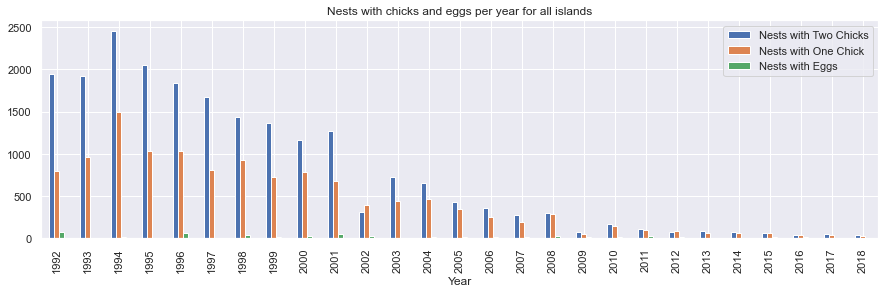

In [29]:
# Nests with Chicks and eggs per year for all islands
chick_brood_info_per_year[['Nests with Two Chicks', 'Nests with One Chick', 'Nests with Eggs']].plot.bar(figsize=(15,4))
plt.title("Nests with chicks and eggs per year for all islands")
plt.show()


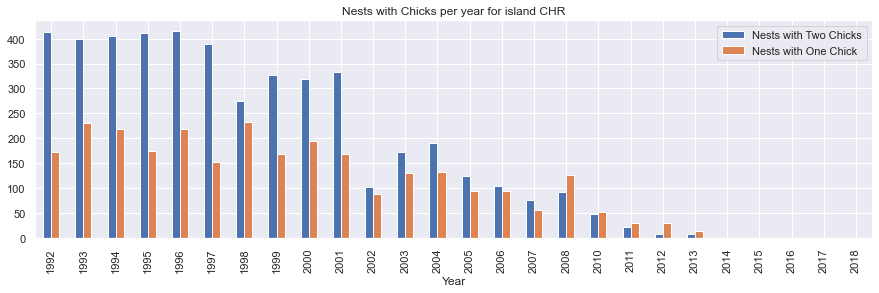

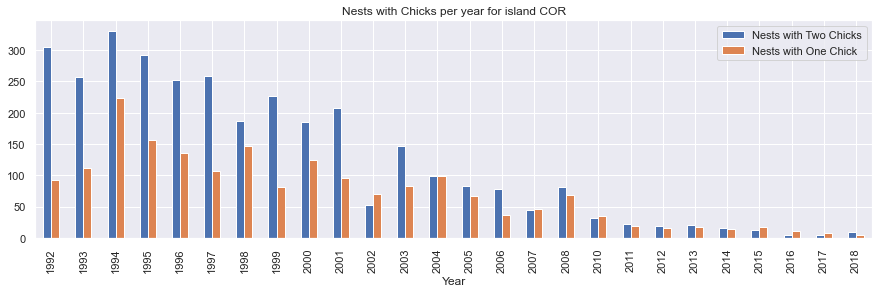

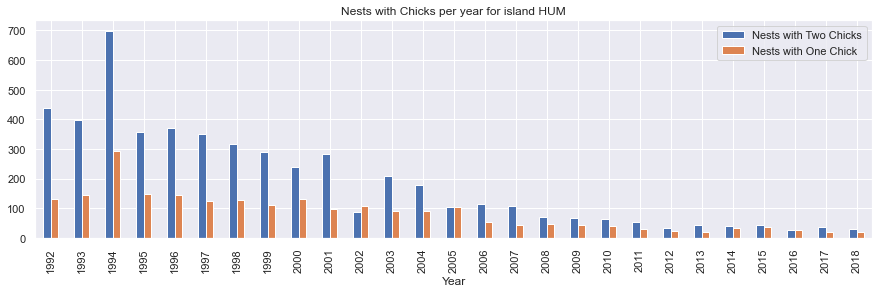

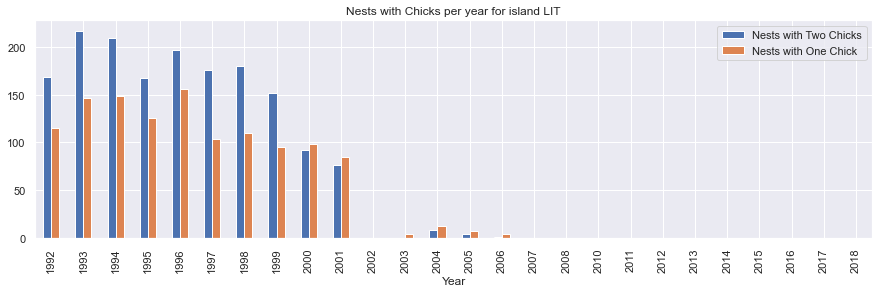

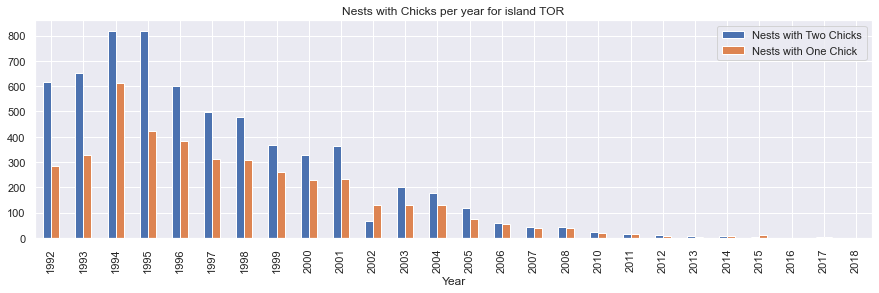

In [30]:
# Adults and chicks per year for each island
for island in chick_brood_info_per_year_per_island['Island'].unique():
    counts_per_year = chick_brood_info_per_year_per_island[chick_brood_info_per_year_per_island['Island'] == island]
    counts_per_year = counts_per_year.set_index('Year')
    counts_per_year[['Nests with Two Chicks', 'Nests with One Chick']].plot.bar(figsize=(15,4))
    plt.title(f'Nests with Chicks per year for island {island}')

/Users/CrystalJin/.conda/envs/15780/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


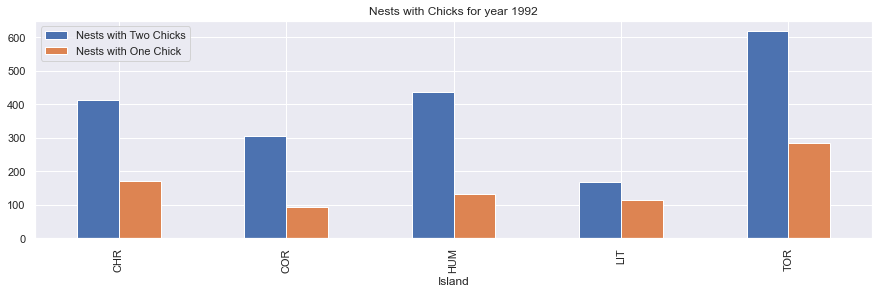

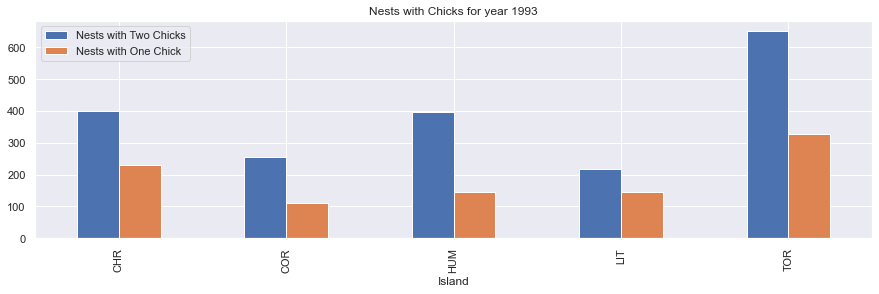

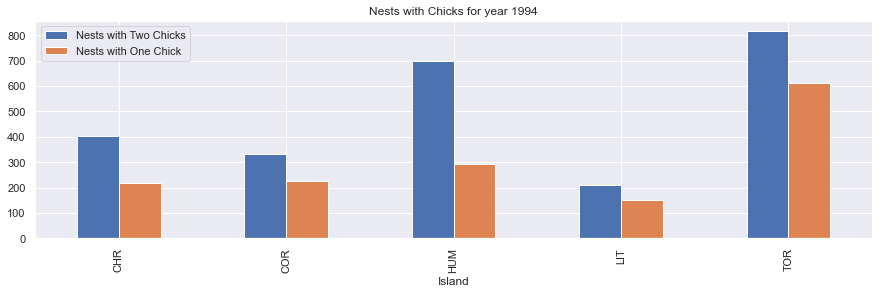

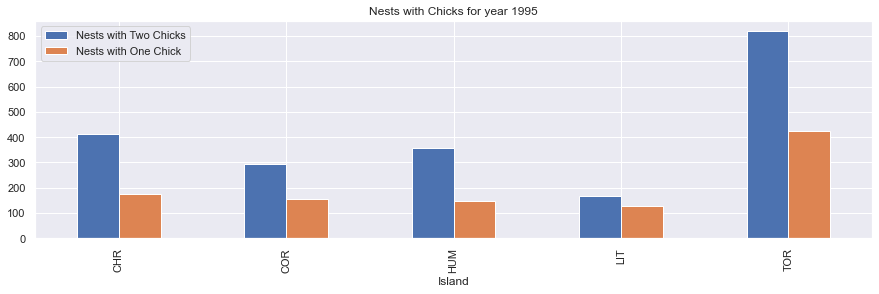

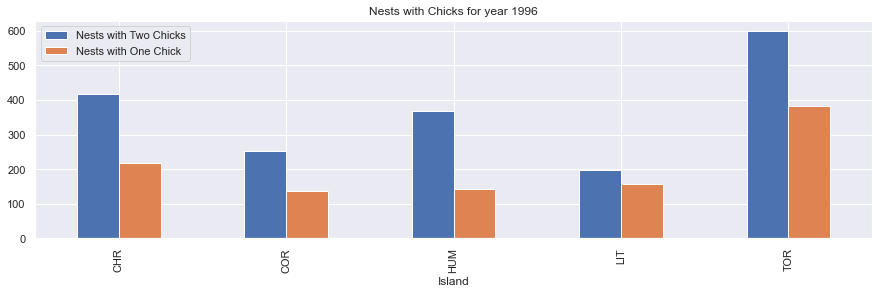

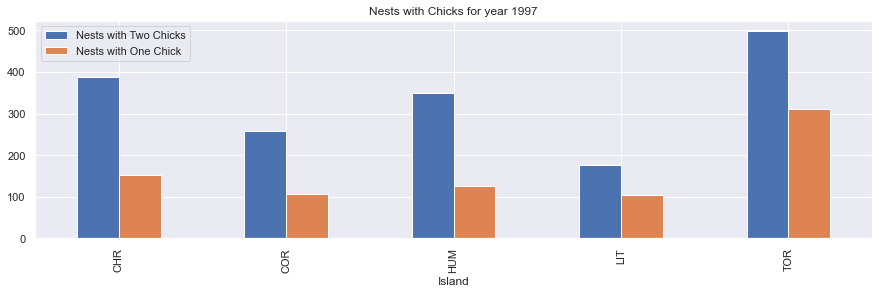

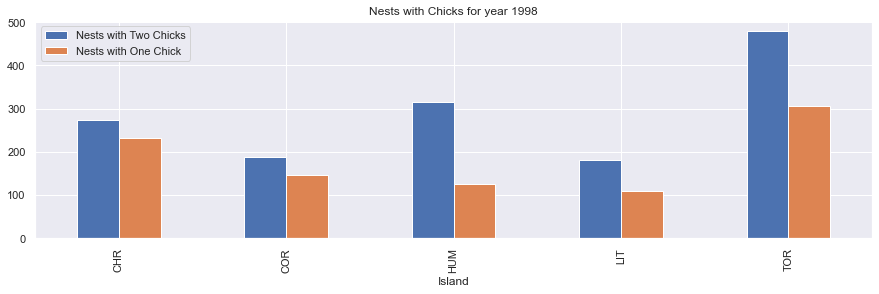

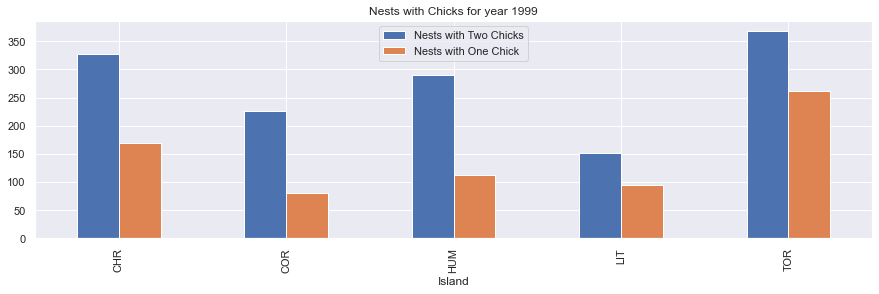

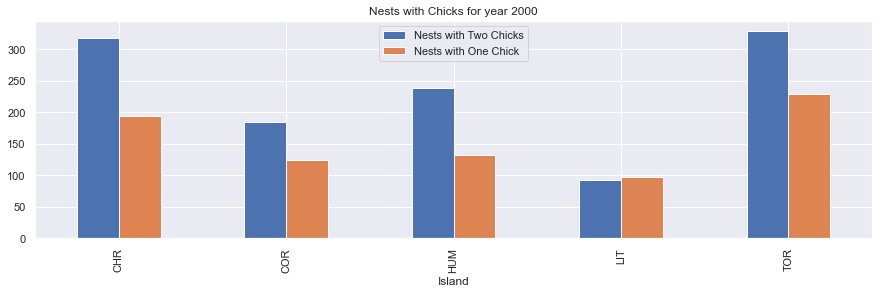

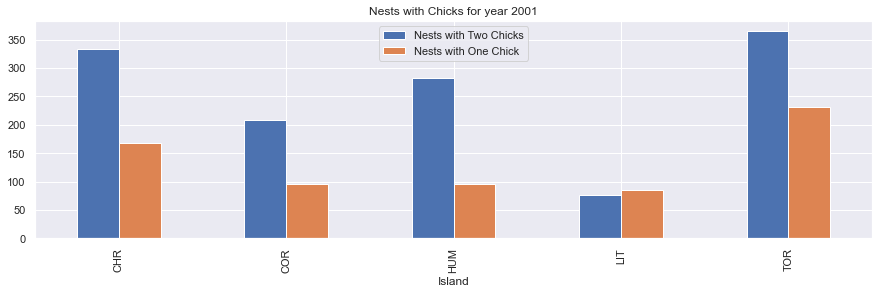

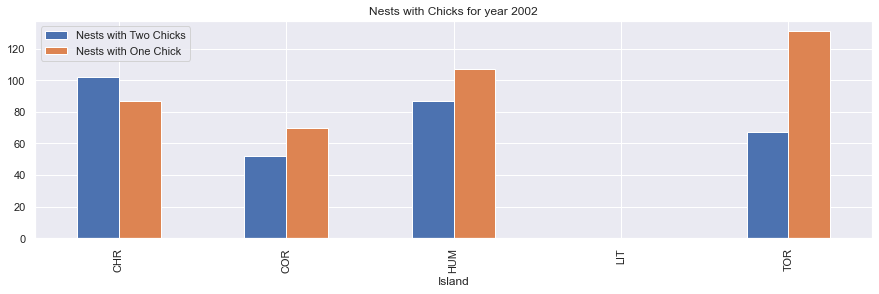

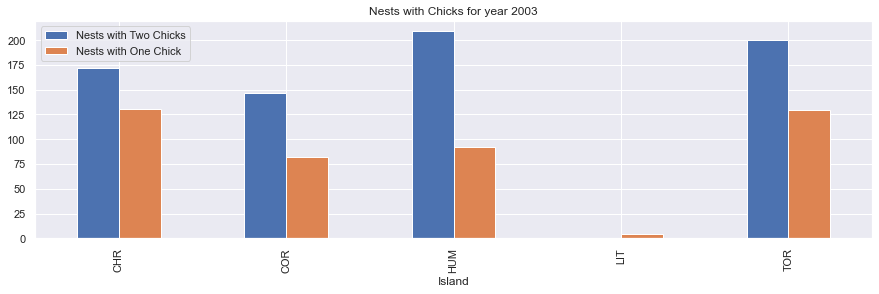

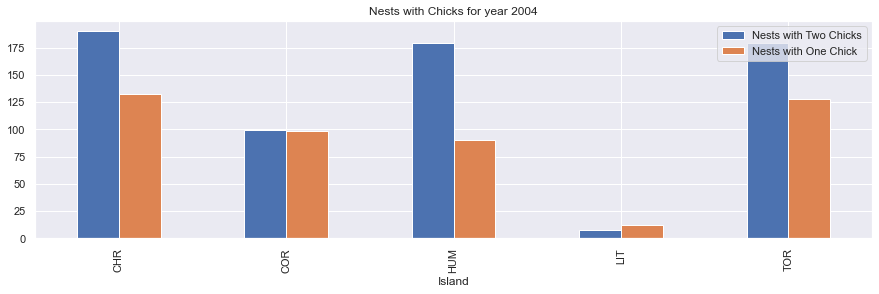

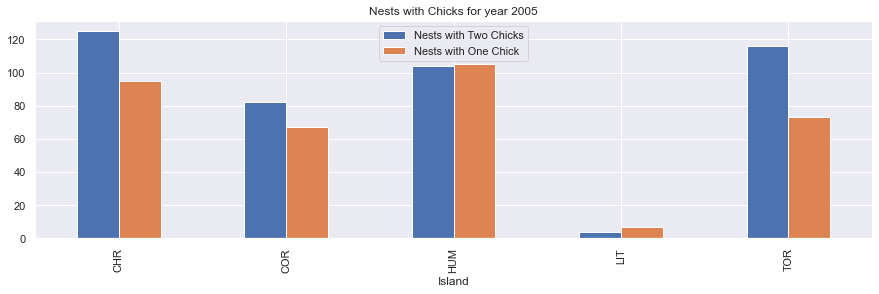

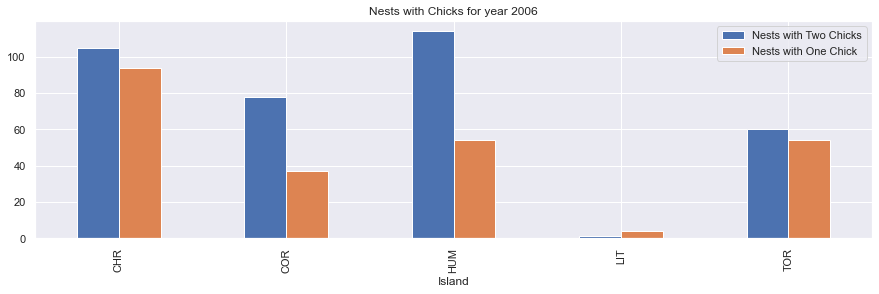

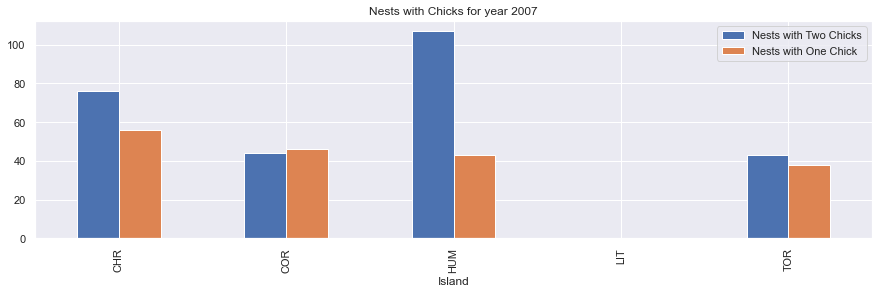

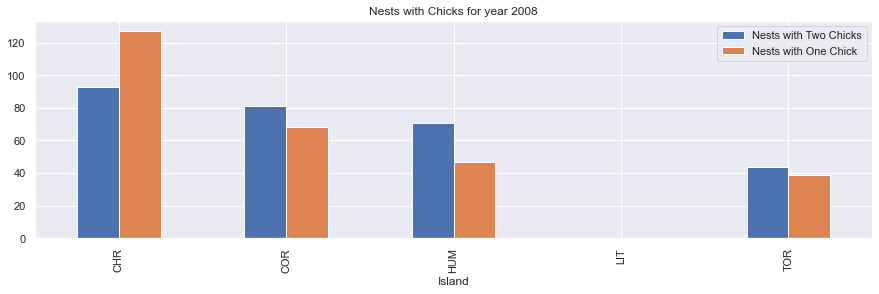

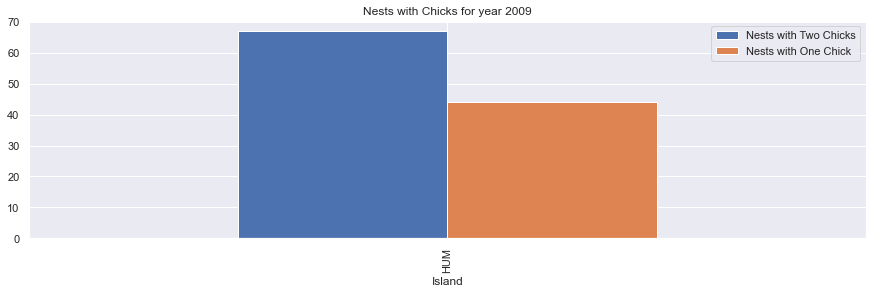

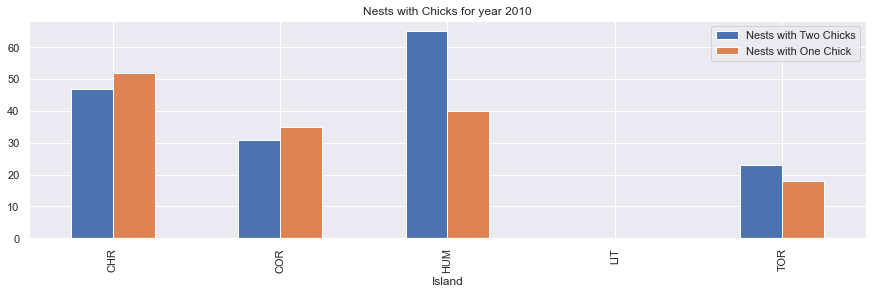

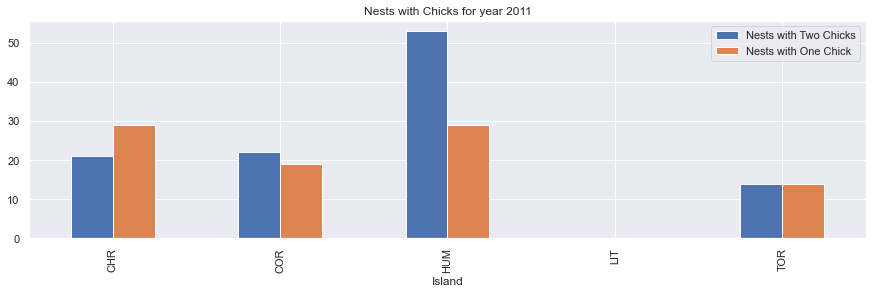

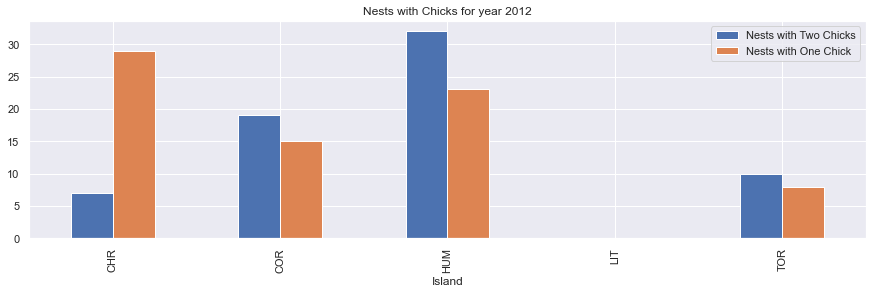

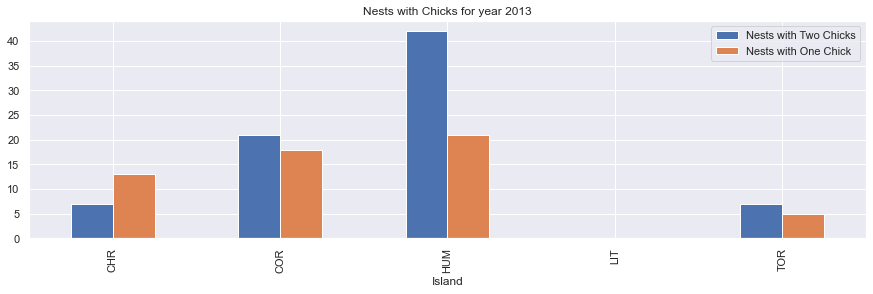

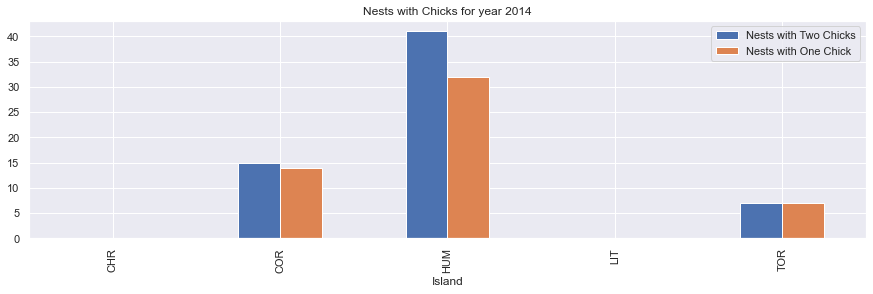

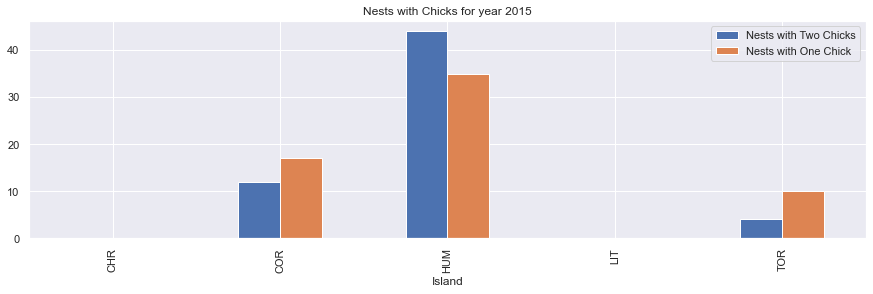

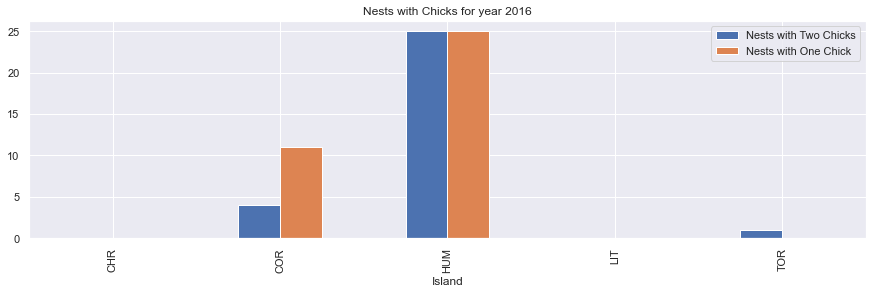

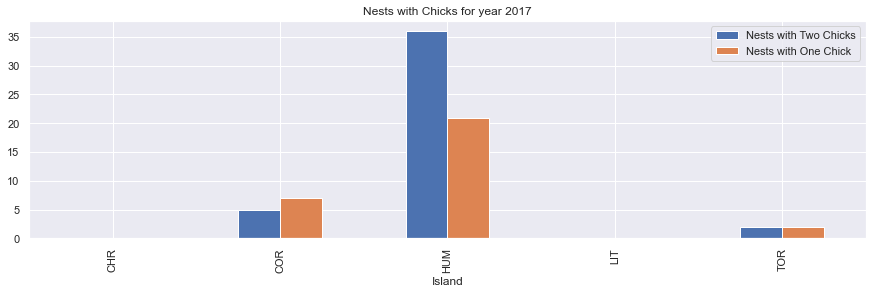

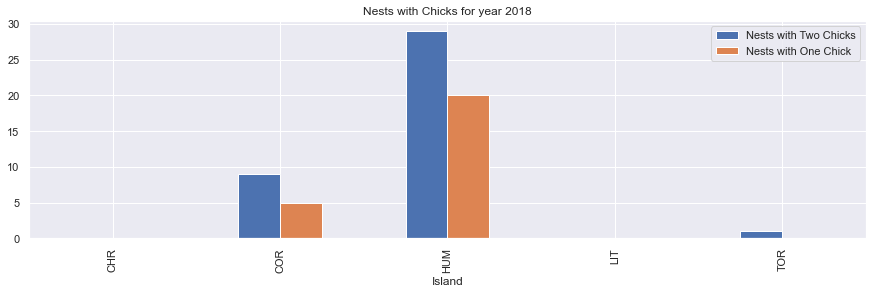

In [31]:
for year in range(1992, 2019):
    counts_per_island = chick_brood_info_per_year_per_island[chick_brood_info_per_year_per_island['Year'] == year]
    counts_per_island = counts_per_island.set_index('Island')
    counts_per_island[['Nests with Two Chicks', 'Nests with One Chick']].plot.bar(figsize=(15,4))
    plt.title(f'Nests with Chicks for year {year}')


In [32]:
chick_brood_df['Percentage of Nests with Chicks'] = chick_brood_df['Nests with Chicks'] / chick_brood_df['Nests in Sample']
chick_brood_df['Percentage of Nests with Chicks'].fillna(0, inplace = True)

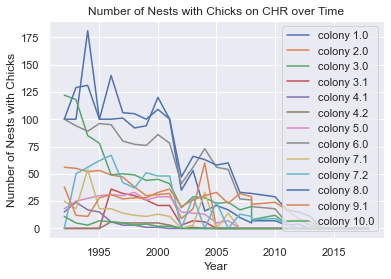

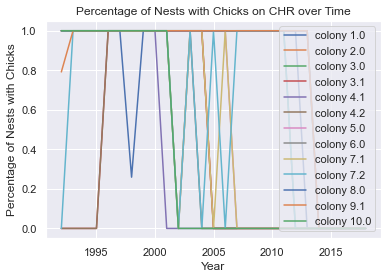

In [33]:
CHR = chick_brood_df[chick_brood_df['Island'] == 'CHR']
# For each island, we look at the value changed for each colony.
CHR_fig1, ax = plt.subplots()

for key, group in CHR.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Number of Nests with Chicks")
ax.set_title('Number of Nests with Chicks on CHR over Time')
plt.legend(loc='best')
plt.show()

CHR_fig2, ax = plt.subplots()

for key, group in CHR.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Nests with Chicks")
ax.set_title('Percentage of Nests with Chicks on CHR over Time')
plt.legend(loc='best')
plt.show()

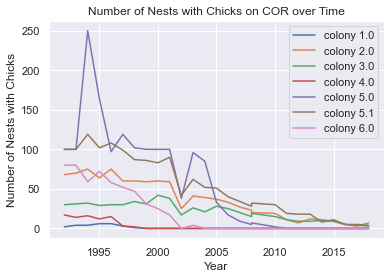

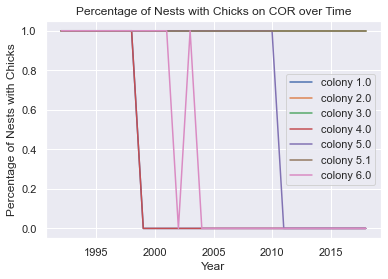

In [34]:
COR = chick_brood_df[chick_brood_df['Island'] == 'COR']

COR_fig1, ax = plt.subplots()
for key, group in COR.groupby(['Colony']):
#     print(key, group)
    ax = group.plot(ax=ax, kind='line', x='Year', y='Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Number of Nests with Chicks")
ax.set_title('Number of Nests with Chicks on COR over Time')
plt.legend(loc='best')
plt.show()

COR_fig2, ax = plt.subplots()

for key, group in COR.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Nests with Chicks")
ax.set_title('Percentage of Nests with Chicks on COR over Time')
plt.legend(loc='best')
plt.show()

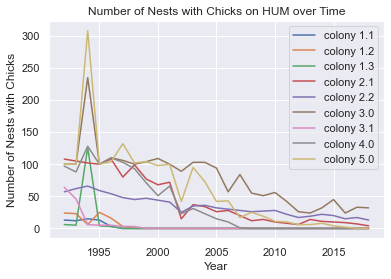

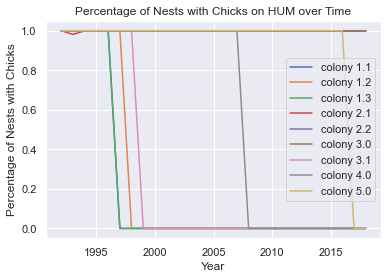

In [35]:
HUM = chick_brood_df[chick_brood_df['Island'] == 'HUM']

HUM_fig1, ax = plt.subplots()
for key, group in HUM.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Number of Nests with Chicks")
ax.set_title('Number of Nests with Chicks on HUM over Time')
plt.legend(loc='best')
plt.show()

COR_fig2, ax = plt.subplots()

for key, group in HUM.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Nests with Chicks")
ax.set_title('Percentage of Nests with Chicks on HUM over Time')
plt.legend(loc='best')
plt.show()

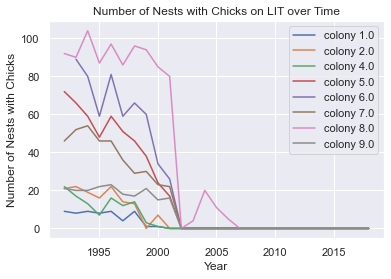

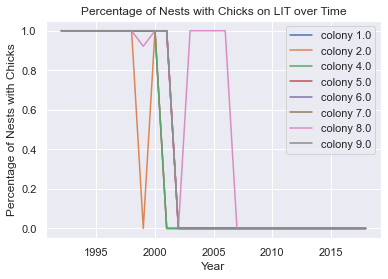

In [36]:
LIT = chick_brood_df[chick_brood_df['Island'] == 'LIT']
LIT_fig1, ax = plt.subplots()
for key, group in LIT.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Number of Nests with Chicks")
ax.set_title('Number of Nests with Chicks on LIT over Time')
plt.legend(loc='best')
plt.show()

LIT_fig2, ax = plt.subplots()

for key, group in LIT.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Nests with Chicks")
ax.set_title('Percentage of Nests with Chicks on LIT over Time')
plt.legend(loc='best')
plt.show()

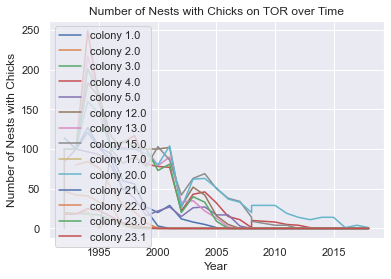

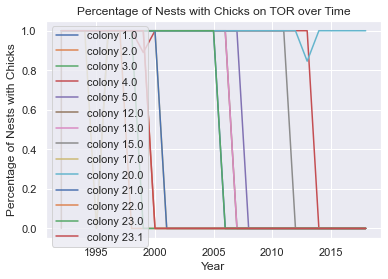

In [37]:
TOR = chick_brood_df[chick_brood_df['Island'] == 'TOR']
TOR_fig1, ax = plt.subplots()
for key, group in TOR.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Number of Nests with Chicks")
ax.set_title('Number of Nests with Chicks on TOR over Time')
plt.legend(loc='best')
plt.show()

TOR_fig2, ax = plt.subplots()

for key, group in TOR.groupby(['Colony']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Nests with Chicks', label='colony ' + str(key))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Nests with Chicks")
ax.set_title('Percentage of Nests with Chicks on TOR over Time')
plt.legend(loc='best')
plt.show()

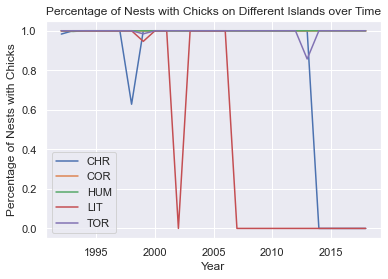

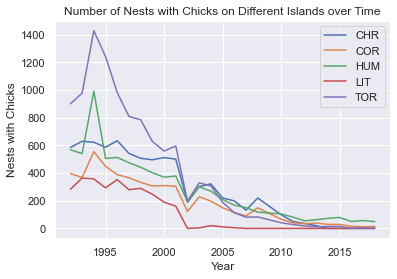

In [38]:
total_info = chick_brood_df.groupby(['Island', 'Year']).agg({'Nests with Chicks': 'sum', 'Nests in Sample' : 'sum'}).reset_index()
total_info['Percentage of Nests with Chicks'] = total_info['Nests with Chicks'] / total_info['Nests in Sample']
total_info['Percentage of Nests with Chicks'].fillna(0, inplace = True)

total_fig1, ax = plt.subplots()
for key, group in total_info.groupby(['Island']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Nests with Chicks', label=key)

ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Nests with Chicks")
ax.set_title('Percentage of Nests with Chicks on Different Islands over Time')
plt.legend(loc='best')
plt.show()

total_fig2, ax = plt.subplots()
for key, group in total_info.groupby(['Island']):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Nests with Chicks', label=key)

ax.set_xlabel("Year")
ax.set_ylabel("Nests with Chicks")
ax.set_title('Number of Nests with Chicks on Different Islands over Time')
plt.legend(loc='best')
plt.show()

In [39]:
# The reproductive success dataset
reproductive_success_df = pd.read_csv('Adelie Penguin Reproductive Success.csv', encoding='unicode_escape', skipinitialspace = True)
study_name_to_year_dict = {
    'PAL9192': 1991,
    'PAL9293': 1992,
    'PAL9394': 1993,
    'PAL9495': 1994,
    'PAL9596': 1995,
    'PAL9697': 1996,
    'PAL9798': 1997,
    'PAL9899': 1998,
    'PAL9900': 1999,
    'PAL0001': 2000,
    'PAL0102': 2001,
    'PAL0203': 2002,
    'PAL0304': 2003,
    'PAL0405': 2004,
    'PAL0506': 2005,
    'PAL0607': 2006,
    'PAL0708': 2007,
    'PAL0809': 2008,
    'PAL0910': 2009,
    'PAL1011': 2010,
    'PAL1112': 2011,
    'PAL1213': 2012,
    'PAL1314': 2013,
    'PAL1415': 2014,
    'PAL1516': 2015,
    'PAL1617': 2016,
    'PAL1718': 2017,
    'PAL1819': 2018,
    'PAL1920': 2019,
}
reproductive_success_df['Year'] = reproductive_success_df['studyName'].map(study_name_to_year_dict)

# Filter out penguins that never lay an egg
reproductive_success_df = reproductive_success_df[reproductive_success_df['Egg 1 Lay Date'] != 0]

# Note that there are only two rows suggesting that a penguin layed a third egg. 
# Since this sample is very small, we only focus on the first two eggs of the penguin
reproductive_success_df = reproductive_success_df[reproductive_success_df['Notes'] != '3rd EGG']

# Rows marked with RELAY 2E is hard to understand, so we filter them out.
# Regular RELAY rows are treated as regular case of penguin laying 2 eggs.
reproductive_success_df = reproductive_success_df[reproductive_success_df['Notes'] != 'RELAY 2E']

# If the is 999, it means that the egg's information is lost, instead of using 999, use -1 instead
reproductive_success_df.loc[reproductive_success_df['Egg 1 Loss Date'] == 999, "Egg 1 Loss Date"] = -1
reproductive_success_df.loc[reproductive_success_df['Egg 2 Loss Date'] == 999, "Egg 2 Loss Date"] = -1

Text(0, 0.5, 'Time Difference between Laying Two Eggs')

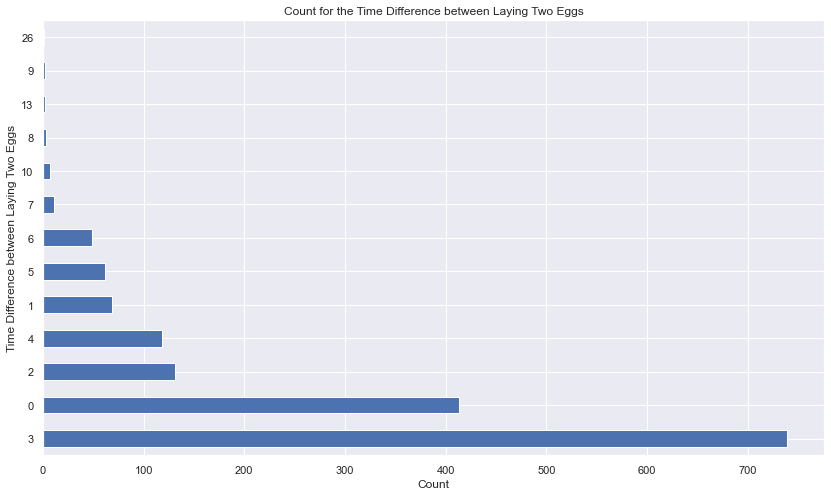

In [40]:
lay_two_eggs_data = reproductive_success_df[reproductive_success_df['Egg 2 Lay Date'] != 0].copy()

# For penguins that layed 2 eggs, we can look at the general time difference between laying the second egg and the first egg:
lay_two_eggs_data['Time Difference between Laying Two Eggs'] = lay_two_eggs_data['Egg 2 Lay Date'] - lay_two_eggs_data['Egg 1 Lay Date']
lay_two_eggs_data['Time Difference between Laying Two Eggs'].value_counts().plot(kind='barh',
                                    figsize=(14,8), rot=0,
                                    title="Count for the Time Difference between Laying Two Eggs")
plt.xlabel("Count")
plt.ylabel("Time Difference between Laying Two Eggs")

# Note that the plot that looks into the average laying time difference over years was not very insightful.

Text(0, 0.5, 'Time Difference between Hatching Two Eggs')

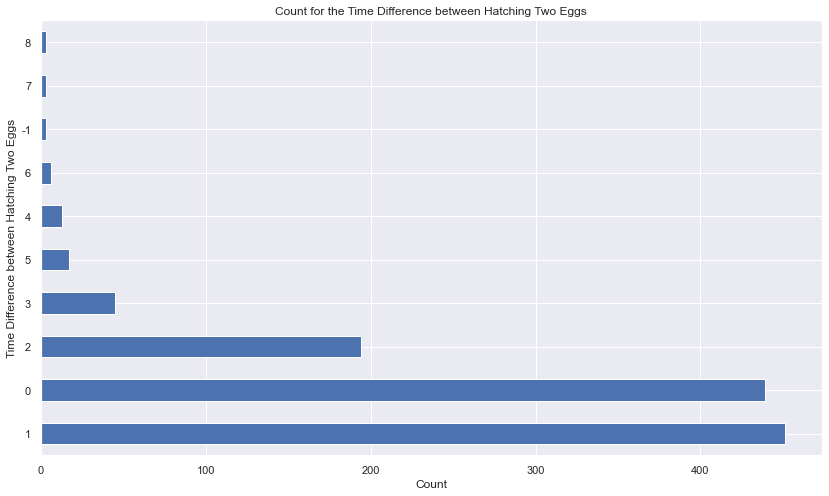

In [41]:
hatch_two_eggs_data = lay_two_eggs_data[(lay_two_eggs_data['Chick 2 Hatch Date'] != 0) & (lay_two_eggs_data['Chick 1 Hatch Date'] != 0)].copy()

# For penguins that hatched 2 eggs, we can look at the general time difference between hatching the second egg and the first egg:
hatch_two_eggs_data['Time Difference between Hatching Two Eggs'] = hatch_two_eggs_data['Chick 2 Hatch Date'] - hatch_two_eggs_data['Chick 1 Hatch Date']
hatch_two_eggs_data['Time Difference between Hatching Two Eggs'].value_counts().plot(kind='barh',
                                    figsize=(14,8), rot=0,
                                    title="Count for the Time Difference between Hatching Two Eggs")
plt.xlabel("Count")
plt.ylabel("Time Difference between Hatching Two Eggs")

# Note that the plot that looks into the average hatching time difference over years was not very insightful.

In [42]:
# Build one dataframe for recording individual egg information
lay_one_egg_data = reproductive_success_df[reproductive_success_df['Egg 2 Lay Date'] == 0].copy()
egg1_data_1 = lay_one_egg_data[['Island', 'Colony', 'Site Number', 'Nest Number',\
       'Egg 1 Lay Date', 'Egg 1 Loss Date', 'Chick 1 Hatch Date', \
       'Chick 1 Loss Date', 'Chick 1 Creche Date','Year']]
egg1_data_2 = lay_two_eggs_data[['Island', 'Colony', 'Site Number', 'Nest Number',\
       'Egg 1 Lay Date', 'Egg 1 Loss Date', 'Chick 1 Hatch Date', \
       'Chick 1 Loss Date', 'Chick 1 Creche Date','Year']]
egg2_data = lay_two_eggs_data[['Island', 'Colony', 'Site Number', 'Nest Number',\
       'Egg 2 Lay Date', 'Egg 2 Loss Date', 'Chick 2 Hatch Date', \
       'Chick 2 Loss Date', 'Chick 2 Creche Date','Year']]
rename_dict2 = {
    'Egg 2 Lay Date': 'Egg Lay Date', 
    'Egg 2 Loss Date': 'Egg Loss Date', 
    'Chick 2 Hatch Date': 'Chick Hatch Date',
    'Chick 2 Loss Date': 'Chick Loss Date', 
    'Chick 2 Creche Date': 'Chick Creche Date'}
rename_dict1 = {
    'Egg 1 Lay Date': 'Egg Lay Date', 
    'Egg 1 Loss Date': 'Egg Loss Date', 
    'Chick 1 Hatch Date': 'Chick Hatch Date',
    'Chick 1 Loss Date': 'Chick Loss Date', 
    'Chick 1 Creche Date': 'Chick Creche Date'
}
egg1_data_1 = egg1_data_1.rename(columns=rename_dict1)
egg1_data_2 = egg1_data_2.rename(columns=rename_dict1)
egg2_data = egg2_data.rename(columns=rename_dict2)
single_egg_info = pd.concat([egg1_data_1, egg1_data_2, egg2_data])
single_egg_info.to_csv('single_egg.csv', index=False)

In [43]:
# Note that some eggs' loss date is marked at -1, or only the Lay Date Information is available.
# which means that the study loses track with the egg. So we ignore thoses rows
single_egg_info = single_egg_info[single_egg_info['Egg Loss Date'] != -1]
single_egg_info = single_egg_info[~((single_egg_info['Egg Loss Date'] == 0) & \
                                 (single_egg_info['Chick Hatch Date'] == 0) & \
                                 (single_egg_info['Chick Loss Date'] == 0) & \
                                 (single_egg_info['Chick Creche Date'] == 0))]
single_egg_info = single_egg_info[~((single_egg_info['Egg Loss Date'] != 0) & \
                                 (single_egg_info['Chick Hatch Date'] != 0))]
# Construct correct information to use
single_egg_info['Egg is Laid'] = True
single_egg_info['Egg is Lost'] = (single_egg_info['Egg Loss Date'] != 0)
single_egg_info['Chick is Hatched'] = (single_egg_info['Chick Hatch Date'] != 0)
single_egg_info['Chick is Lost'] = (single_egg_info['Chick Loss Date'] != 0)
single_egg_info['Chick is Creche'] = (single_egg_info['Chick Creche Date'] != 0)

single_egg_info_by_colony_and_year = single_egg_info.groupby(['Colony', 'Year']).agg({\
    'Egg is Laid': 'sum', 
    'Egg is Lost': 'sum', 
    'Chick is Hatched':'sum', 
    'Chick is Lost':'sum', 
    'Chick is Creche':'sum', 
}).reset_index()



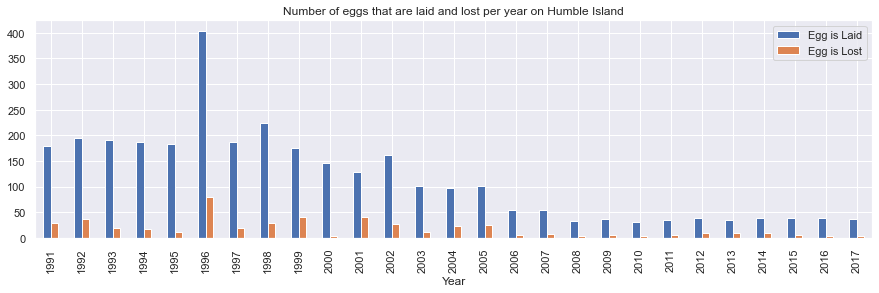

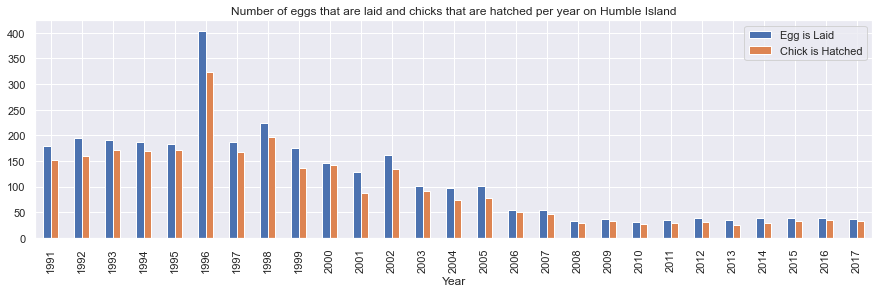

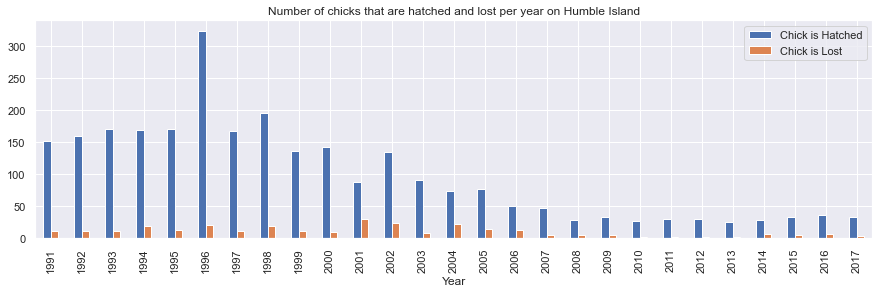

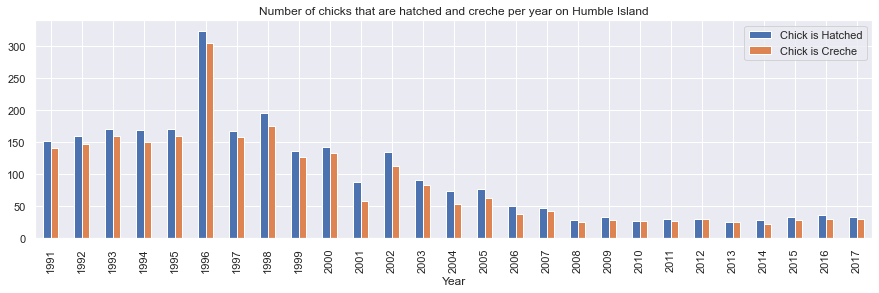

In [51]:
# Nests with Chicks and eggs per year for all islands
single_egg_info_by_year = single_egg_info.groupby(['Year']).agg({\
    'Egg is Laid': 'sum', 
    'Egg is Lost': 'sum', 
    'Chick is Hatched':'sum', 
    'Chick is Lost':'sum', 
    'Chick is Creche':'sum', 
})

single_egg_info_by_year[['Egg is Laid', 'Egg is Lost']].plot.bar(figsize=(15,4))
plt.title("Number of eggs that are laid and lost per year on Humble Island")
plt.show()

single_egg_info_by_year[['Egg is Laid', 'Chick is Hatched']].plot.bar(figsize=(15,4))
plt.title("Number of eggs that are laid and chicks that are hatched per year on Humble Island")
plt.show()

single_egg_info_by_year[['Chick is Hatched', 'Chick is Lost']].plot.bar(figsize=(15,4))
plt.title("Number of chicks that are hatched and lost per year on Humble Island")
plt.show()

single_egg_info_by_year[['Chick is Hatched', 'Chick is Creche']].plot.bar(figsize=(15,4))
plt.title("Number of chicks that are hatched and creche per year on Humble Island")
plt.show()

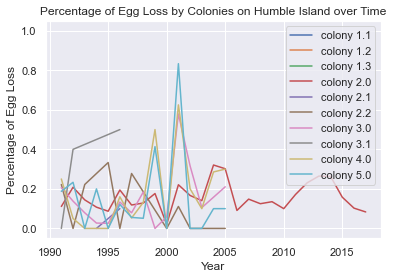

In [44]:
single_egg_info_by_colony_and_year['Percentage of Egg Loss'] = single_egg_info_by_colony_and_year['Egg is Lost'] / single_egg_info_by_colony_and_year['Egg is Laid']
single_egg_info_fig1, ax = plt.subplots()
for (key, group) in single_egg_info_by_colony_and_year.groupby('Colony'):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Egg Loss', label='colony ' + str(key))
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Egg Loss")
ax.set_title('Percentage of Egg Loss by Colonies on Humble Island over Time')
plt.legend(loc='best')
plt.show()

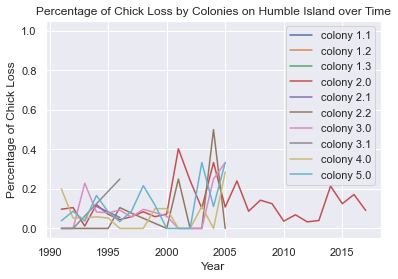

In [45]:
single_egg_info_by_colony_and_year['Percentage of Chick Loss'] = single_egg_info_by_colony_and_year['Chick is Lost'] / single_egg_info_by_colony_and_year['Chick is Hatched']

single_egg_info_fig2, ax = plt.subplots()
for (key, group) in single_egg_info_by_colony_and_year.groupby('Colony'):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Chick Loss', label='colony ' + str(key))
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Chick Loss")
ax.set_title('Percentage of Chick Loss by Colonies on Humble Island over Time')
plt.legend(loc='best')
plt.show()

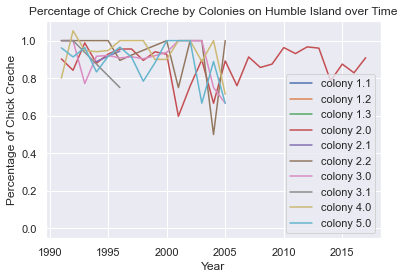

In [46]:
single_egg_info_by_colony_and_year['Percentage of Chick Creche'] = single_egg_info_by_colony_and_year['Chick is Creche'] / single_egg_info_by_colony_and_year['Chick is Hatched']

single_egg_info_fig3, ax = plt.subplots()
for (key, group) in single_egg_info_by_colony_and_year.groupby('Colony'):
    ax = group.plot(ax=ax, kind='line', x='Year', y='Percentage of Chick Creche', label='colony ' + str(key))
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Chick Creche")
ax.set_title('Percentage of Chick Creche by Colonies on Humble Island over Time')
plt.legend(loc='best')
plt.show()

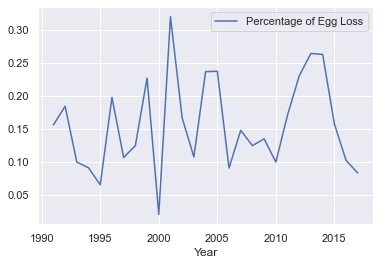

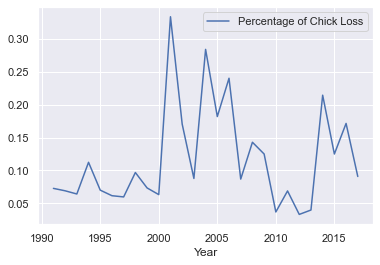

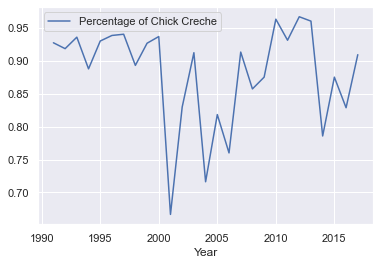

In [47]:
single_egg_info_by_year = single_egg_info.groupby(['Year']).agg({\
    'Egg is Laid': 'sum', 
    'Egg is Lost': 'sum', 
    'Chick is Hatched':'sum', 
    'Chick is Lost':'sum', 
    'Chick is Creche':'sum', 
}).reset_index()
single_egg_info_by_year['Percentage of Egg Loss'] = single_egg_info_by_year['Egg is Lost'] / single_egg_info_by_year['Egg is Laid']
single_egg_info_by_year['Percentage of Chick Loss'] = single_egg_info_by_year['Chick is Lost'] / single_egg_info_by_year['Chick is Hatched']
single_egg_info_by_year['Percentage of Chick Creche'] = single_egg_info_by_year['Chick is Creche'] / single_egg_info_by_year['Chick is Hatched']

lines = single_egg_info_by_year.plot.line(x='Year', y='Percentage of Egg Loss')
lines = single_egg_info_by_year.plot.line(x='Year', y='Percentage of Chick Loss')
lines = single_egg_info_by_year.plot.line(x='Year', y='Percentage of Chick Creche')